In [4]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

In [207]:
def plot_solution(x, t, U, txt='Solution'):
    # Plot the solution of the heat equation
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    T, X = np.meshgrid(t,x)
    # ax.plot_wireframe(T, X, U)
    ax.plot_surface(T, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)              # Rotate the figure
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(txt);

# a) 

In [208]:
def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = v*np.diag(e[1:],-1)+d*np.diag(e)+w*np.diag(e[1:],1)
    return A

In [269]:
def init_cond(x, K, Euro = True):
    if Euro == True: 
        K_arr = K*np.ones(len(x))
        return np.where(K_arr - x < 0, 0, K_arr - x) 
    return (K-x) > 0

In [331]:
def crank_nicolson(g, sigma = 0.6, c = 0.08, r = 0.3, M = 20, N = 1000, T = 0.5, K = 0.5, R = 1):
    #R : RHS BOUNDARY 
    
    h = 1/M     # Stepsize in space
    k = T/N     # Stepsize in time
    
    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,R,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis 
    U[:,0] = g(x, K, Euro = True)
    
    print('h={:.4f}, k={:.4f}, r={:.4f}'.format(h,k,k/h**2))
    
    #boundary conditions 
    U[-1,:] = np.zeros(N+1) #artificial bndry cond. at x = R -> U(R,t) = 0
    U[0,:] = U[0,0]*np.exp(-c*t) #at x = 0 we solve an ODE -> u_t = -cu
    print(U[0,0])
    
    alpha = (r*x[2:-1]*k)/(4*h) - (sigma**2*x[2:-1]**2*k)/(4*h**2)
    beta = (sigma**2)*(x[1:-1]**2)*k/(2*h**2) + (c*k)/2
    gamma = (sigma**2)*(x[1:-2]**2)*k/(4*h**2) + (r*x[1:-2]*k)/(4*h)
    
    A = np.diag(alpha, k=-1) + np.diag(1+beta) + np.diag(-gamma, k = 1)
    B = np.diag(-alpha, k=-1) + np.diag(1-beta) + np.diag(gamma, k = 1)
    
    '''
    Dette gir noe som kan virke som feil resultat: 
    alpha = (r*x[1:-1]*k)/(4*h) - (sigma**2*x[1:-1]**2*k)/(4*h**2)
    beta = (sigma**2)*(x[1:-1]**2)*k/(2*h**2) + (c*k)/2
    gamma = (sigma**2)*(x[1:-1]**2)*k/(4*h**2) + (r*x[1:-1]*k)/(4*h)
    

    A = tridiag(alpha, 1+beta, - gamma, M-1)
    B = tridiag(-alpha, 1-beta, gamma, M-1)
    '''

    #main loop 
    for n in range(1,N+1):
        q = np.zeros(M-1) #q vector 
        q[0] = (sigma**2 *x[1]**2 * k / (4*h**2) - r*x[1]*k/(4*h))* (U[0,n] + U[0, n-1])
        q[-1] =(k*sigma**2 *x[-2] / (4*h**2) + r*k*x[-2]/(4*h))* (U[-1, n] + U[-1, n-1])
        U[1:-1, n] = np.linalg.solve(A, B@U[1:-1,n-1]+q)
    return x, t, U 

h=0.0500, k=0.0005, r=0.2000
0.5


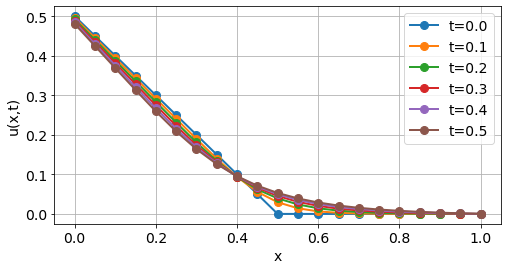

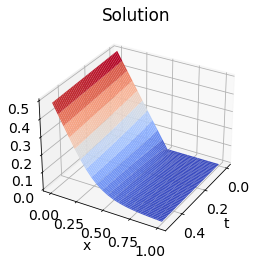

In [332]:
x,t,U = crank_nicolson(init_cond)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
for tn in tplots:
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()